In [11]:
import pandas as pd
import json
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import math
import numpy as np
import pandas as pd
import nltk
import spacy
from tqdm import tqdm
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from collections import Counter

In [5]:
all_data=pd.read_csv('WikiLarge_Train.csv')


In [6]:
nlp = spacy.load('en_core_web_sm')
tokenizer = RegexpTokenizer(r'\w+')
def tokenizer(text):
    return tokenizer.tokenize(text)
  
def remove_stopwords(review):
    all_word = []
    for sentence in tqdm(review):
        all_word_list = []
        for token in sentence:
            if nlp.vocab[token].is_stop == True:
                continue
            else:
                all_word_list.append(token)
        all_word.append(" ".join(all_word_list))    
        
    return all_word

In [7]:
from nltk.tokenize import RegexpTokenizer
rest_tokenizer = RegexpTokenizer(r'\w+')
def tokenizer(text):
    return rest_tokenizer.tokenize(text)

In [12]:

def result_evalation(predict_result, true_result):
    accuracy=accuracy_score(true_result, predict_result)
    print("accuracy:", accuracy)
    precision=precision_score(true_result, predict_result)
    print("precision:", precision)
    recall=recall_score(true_result, predict_result)
    print("recall:",recall )
    f1=f1_score(true_result, predict_result)
    print("f1:", f1)
    auc=roc_auc_score(true_result, predict_result)
    print("auc:", auc)
    return accuracy,precision,recall, f1, auc
    


In [9]:
tokenized_text=[]
for i in range(len(all_data)):
    tokenized_text.append(tokenizer(all_data['original_text'][i]))
tokenized_text_new=remove_stopwords(tokenized_text)

100%|██████████| 416768/416768 [00:09<00:00, 45542.40it/s]


In [11]:
all_data['tokenize']=tokenized_text_new

In [12]:
def train(y_j,
          x_i,
          smoothing_alpha=1):

    smoothing_additive = smoothing_alpha * train_word_size
    if int(y_j) == 1:
        try:
            return (train_text_word_counts_not_simple[x_i] + smoothing_alpha
                ) / (len(train_word_is_not_simple) + smoothing_additive)
        except:
            return (( smoothing_alpha
                ) / (len(train_word_is_not_simple) + smoothing_additive))
            
    if int(y_j) == 0:
        try :
            return (train_text_word_counts_simple[x_i] + smoothing_alpha) / (
            len(train_word_is_simple) + smoothing_additive)
        except:
            return (  smoothing_alpha) / (
            len(train_word_is_simple) + smoothing_additive)

In [13]:
def classify(word_list,smoothing_alpha):
    word_seperated=tokenizer(word_list)
    word_seperated_no_stop=word_seperated
    #for word in word_seperated:
     #   if word not in STOP_WORDS:
      #      word_seperated_no_stop.append(word)
    p_x_y0=np.log(p_y0)
   # print(p_x_y0)
    p_x_y1=np.log(p_y1)
   # print(p_x_y1)
    for i in range(len(word_seperated_no_stop)):
        temp1=train(0,word_seperated_no_stop[i],smoothing_alpha)
        #print(temp1)
        temp2=train(1,word_seperated_no_stop[i],smoothing_alpha)
        #print(temp2)
        if temp1==0 and temp2!=0:
            #print("yes")
            return 1
        if temp2==0 and temp1!=0:
            #print("no")
            return 0
        if temp1!=0 and temp2!=0:
            p_x_y0=p_x_y0+np.log(temp1)
            p_x_y1=p_x_y1+np.log(temp2)
        if temp1==0 and temp2==0:
            # both numerators are 0
            return np.random.binomial(1,probability,1)[0]
    if(p_x_y0>p_x_y1):
        return 0
    else:
        return 1
   

In [14]:
def plot_roc(predict_results, true_label):
    from sklearn import metrics
    import pylab as plt
    fpr, tpr, threshold = metrics.roc_curve(predict_results, true_label)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(6,6))
    plt.title('ROC curve for validation set')
    plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

TRAIN: 333414 Valid: 83354
accuracy: 0.5750293927106078
precision: 0.5716640356579069
recall: 0.5919898069572325
f1: 0.5816494041784276
auc: 0.5750618862599464


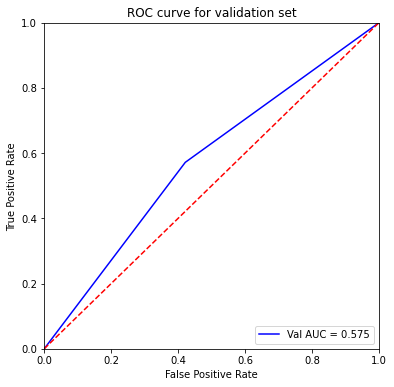

TRAIN: 333414 Valid: 83354
accuracy: 0.5774887827818701
precision: 0.5753013460907087
recall: 0.5891450528338137
f1: 0.5821409079044162
auc: 0.5774991218045464


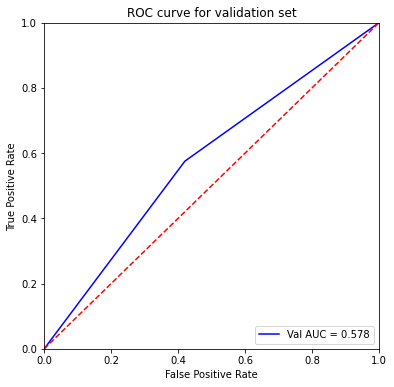

TRAIN: 333414 Valid: 83354
accuracy: 0.5767809583223361
precision: 0.5780270847513319
recall: 0.5874159232934217
f1: 0.5826836856612211
auc: 0.5767170376339659


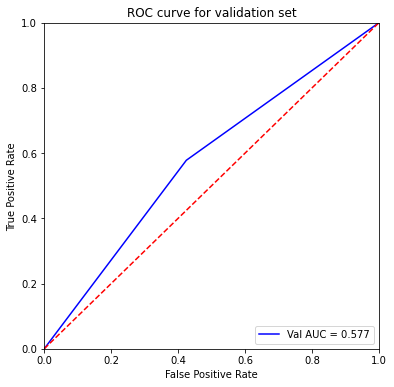

TRAIN: 333415 Valid: 83353
accuracy: 0.5769678355908006
precision: 0.5744128380275101
recall: 0.5899382552915455
f1: 0.5820720389707364
auc: 0.5769844643340066


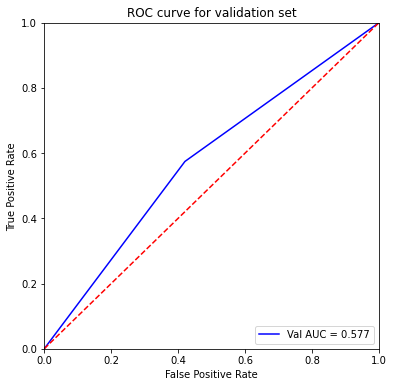

TRAIN: 333415 Valid: 83353
accuracy: 0.5783355128189748
precision: 0.5752619175397251
recall: 0.5926727246502236
f1: 0.5838375466224617
auc: 0.5783624669832366


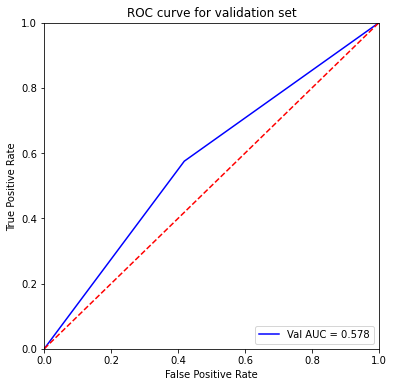

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
kf.get_n_splits(all_data)
all_accuracy=[]
all_recall=[]
all_precision=[]
all_f1=[]
all_auc=[]
for train_index, test_index in kf.split(all_data):
    print("TRAIN:", len(train_index), "Valid:", len(test_index))
    train_df = all_data.iloc[train_index]
    dev_df=all_data.iloc[test_index]
    train_df.reset_index(inplace=True)
    dev_df.reset_index(inplace=True)
    train_word_is_simple=[]
    train_word_is_not_simple=[]
    train_label=train_df['label'].tolist()
    train_text_no_punc=train_df['tokenize'].tolist()
    dev_label=dev_df['label'].tolist()
    dev_text_no_punc=dev_df['tokenize'].tolist()
    for i in range(len(train_df)):
        if int(train_label[i])==1:
            train_word_is_not_simple.extend(tokenizer(train_text_no_punc[i]))
        else:
            train_word_is_simple.extend(tokenizer(train_text_no_punc[i]))
    train_word_size=len(set(train_word_is_not_simple+train_word_is_simple))
    p_y1=train_label.count(1)/len(train_label)
    p_y0=train_label.count(0) / len(train_label) 
    
    train_text_word_counts_not_simple=Counter(train_word_is_not_simple)

    train_text_word_counts_simple=Counter(train_word_is_simple) 
    predict_result_dev=[]
    for smoothing_alpha in [1]:
        for i in range(len(dev_text_no_punc)):
            temp=classify(dev_text_no_punc[i],smoothing_alpha)
            predict_result_dev.append(temp)
    accuracy_each, precsion_each, recall_each, f1_each, auc_reach=result_evalation(predict_result_dev,dev_label)
    plot_roc(predict_result_dev,dev_label)
    all_accuracy.append(accuracy_each)
    all_precision.append(precsion_each)
    all_recall.append(recall_each)
    all_f1.append(f1_each)
    all_auc.append(auc_reach)
    
        

In [20]:
np.mean(all_accuracy)

0.5769204964449178

In [21]:
np.mean(all_precision)

0.5749334444134366

In [22]:
np.mean(all_recall)

0.5902323526052473

In [23]:
np.mean(all_f1)

0.5824767166674526

In [24]:
np.mean(all_auc)

0.5769249954031404

accuracy: 0.5762290951843942
precision: 0.574069756597967
recall: 0.5908054802409003
f1: 0.5823173976279724
auc: 0.5762290951843944


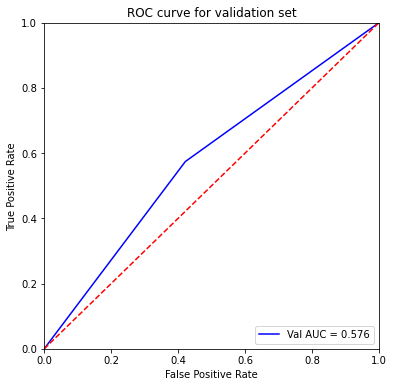

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
sss= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(all_data, all_data['label']):
    train_df=all_data.iloc[train_index]
    dev_df=all_data.iloc[test_index]
train_df['label'].value_counts()/len(train_df)
train_word_is_simple=[]
train_word_is_not_simple=[]
train_label=train_df['label'].tolist()
train_text_no_punc=train_df['tokenize'].tolist()
dev_label=dev_df['label'].tolist()
dev_text_no_punc=dev_df['tokenize'].tolist()
for i in range(len(train_df)):
    if int(train_label[i])==1:
        train_word_is_not_simple.extend(tokenizer(train_text_no_punc[i]))
    else:
        train_word_is_simple.extend(tokenizer(train_text_no_punc[i]))
train_word_size=len(set(train_word_is_not_simple+train_word_is_simple))
p_y1=train_label.count(1)/len(train_label)
p_y0=train_label.count(0) / len(train_label) 

train_text_word_counts_not_simple=Counter(train_word_is_not_simple)

train_text_word_counts_simple=Counter(train_word_is_simple) 
predict_result_dev=[]
for smoothing_alpha in [1]:
    for i in range(len(dev_text_no_punc)):
        temp=classify(dev_text_no_punc[i],smoothing_alpha)
        predict_result_dev.append(temp)
result_evalation(predict_result_dev,dev_label)
plot_roc(predict_result_dev,dev_label)
test_data=pd.read_csv('WikiLarge_Test.csv')

In [27]:
test_data

,id,original_text,label
0,0,-2011,NaN
1,1,-2011,NaN
2,2,-2000,NaN
3,3,-1997,NaN
4,4,1.636,NaN
...,...,...,...
119087,119087,#NAME?,NaN
119088,119088,#NAME?,NaN
119089,119089,#NAME?,NaN
119090,119090,#NAME?,NaN


In [28]:
tokenized_text_test=[]
for i in range(len(test_data)):
    tokenized_text_test.append(tokenizer(test_data['original_text'][i]))
tokenized_text_test=remove_stopwords(tokenized_text_test)

100%|██████████| 119092/119092 [00:01<00:00, 69904.45it/s]


In [29]:
predict_result_test=[]
for smoothing_alpha in [1]:
    for i in range(len(tokenized_text_test)):
        temp=classify(tokenized_text_test[i],smoothing_alpha)
        predict_result_test.append(temp)


In [77]:
result_1=pd.DataFrame({'id':list(test_data['id']), 'label':predict_result_test})
result_1.to_csv('results_NB.csv',index=None)

In [1]:
# dummy classifier

In [3]:
import pandas as pd
all_data=pd.read_csv('WikiLarge_Train.csv')
from sklearn.model_selection import StratifiedShuffleSplit
sss= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(all_data, all_data['label']):
    train_df=all_data.iloc[train_index]
    dev_df=all_data.iloc[test_index]


In [6]:
from sklearn.dummy import DummyClassifier
dum_clf=DummyClassifier(strategy='uniform')

In [7]:
dum_clf.fit(train_df['original_text'],train_df['label'])

DummyClassifier(strategy='uniform')

In [9]:
dummy_prediction=dum_clf.predict(dev_df['original_text'])

In [13]:
result_evalation(dummy_prediction,dev_df['label'])

accuracy: 0.5017275715622526
precision: 0.5017276130146847
recall: 0.5017155745375147
f1: 0.5017215937038859
auc: 0.5017275715622526


(0.5017275715622526,
 0.5017276130146847,
 0.5017155745375147,
 0.5017215937038859,
 0.5017275715622526)